## Optical Bloch Equations without damping

In [1]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

The behaviour of a two level system under the influence of an oscilating electric field can be modelled with the optical Bloch equation below.

$$ \dot{\mathbf{R}} = \mathbf{R}\times\mathbf{W}-\frac{\Gamma}{2}\mathbf{R}+\frac{\Gamma}{2}\cdot
\begin{pmatrix}
    0 \\
    0 \\
    1    
\end{pmatrix}$$
$$
R = \begin{pmatrix}
    \tilde{\rho}_{12}+\tilde{\rho}_{21} \\
    i(\tilde{\rho}_{12}-\tilde{\rho}_{21}) \\
    \rho_{11}-\rho_{22}    
\end{pmatrix} ; W = \begin{pmatrix}
    \Omega \\
    0 \\
    \delta    
\end{pmatrix}$$

#### Functions used for the simulations defined below

In [2]:
def dR(R,t,Δ,Γ,f):
    W = np.array([1,0,Δ-f*t])
    return np.cross(R,W)-(Γ/2)*R+np.array([0,0,Γ/2], dtype='float32')

In [3]:
def unitcircle(axes):
    a = np.linspace(0, 2 * np.pi, 100)
    b = np.linspace(0, np.pi, 100)
    x = 1 * np.outer(np.cos(a), np.sin(b))
    y = 1 * np.outer(np.sin(a), np.sin(b))
    z = 1 * np.outer(np.ones(np.size(a)), np.cos(b))
    axes.plot(np.sin(a),np.cos(a),color='k', linewidth=0.2)
    axes.plot(np.sin(a),np.cos(a),zdir='x',color='k', linewidth=0.2)
    axes.plot(np.sin(a),np.cos(a),zdir='y',color='k', linewidth=0.2)
    axes.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=1, alpha=0.1)

In [4]:
def makeplot(T, N, Δ, Γ, axes, dΔ=False):
    global dR
    if dΔ:
        f=2*Δ/T
    else: f=0
    R0 = np.array([0,0,1], dtype='float32')
    t = np.linspace(0, T, num=N)
    R = sp.odeint(dR, R0, t, args=(Δ, Γ, f))
    axes.plot(R[:,0],R[:,1],R[:,2],linewidth=0.5)

In [5]:
def make2dplot(T, N, Δ, Γ, axes, dΔ=False):
    global dR
    if dΔ:
        f=2*Δ/T
    else: f=0
    R0 = np.array([0,0,1], dtype='float32')
    t = np.linspace(0, T, num=N)
    R = sp.odeint(dR, R0, t, args=(Δ, Γ, f))
    axes.plot(t,0.5*(R[:,2]+1),linewidth=0.5)
    axes.plot(t,0.5*(1-R[:,2]),'--',linewidth=0.5)

### Simulation of Two level oscillations without dampening
The plot below shows the behaviour of a two level system (starting polarised in one level) under optical exciations. At resonance ($\delta = 0$) the system shows Rabi Oscillations. Off resonance, the levels are no longer perfectly coupled and so the second level is never fully occupied. Moving further from resonance, the levels mix even more poorly.

<IPython.core.display.Javascript object>


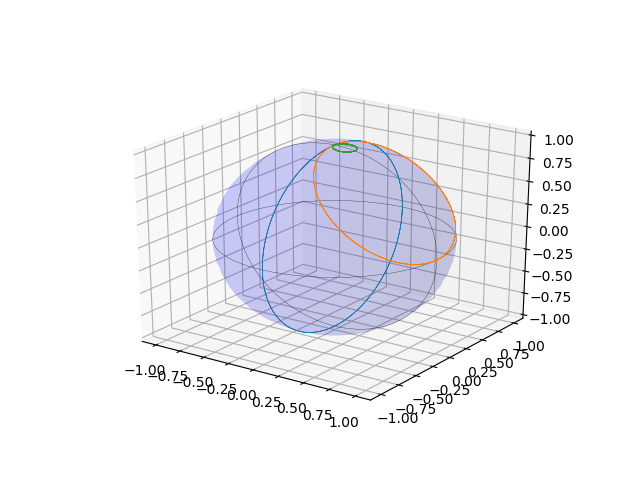

<IPython.core.display.Javascript object>


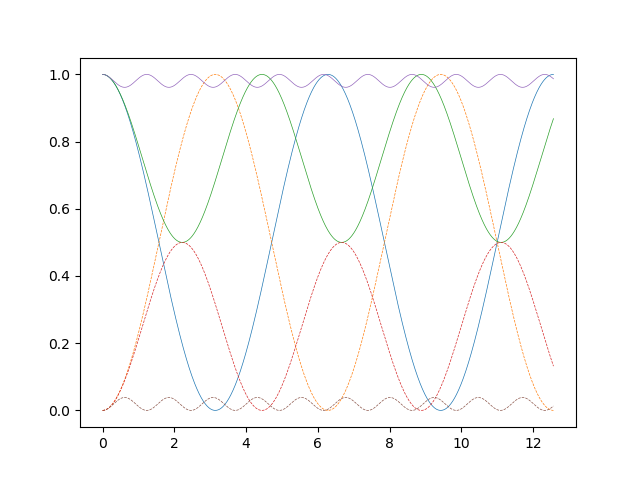

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(25, -55)

unitcircle(ax)
makeplot(2*np.pi*2,1000,0,0,ax)
makeplot(2*np.pi*2,2000,1,0,ax)
makeplot(2*np.pi*2,10000,10,0,ax)

figa = plt.figure()
axa = figa.gca()
make2dplot(2*np.pi*2,1000,0,0,axa)
make2dplot(2*np.pi*2,2000,1,0,axa)
make2dplot(2*np.pi*2,10000,5,0,axa)

### Adibatic and Non-Adiabatic Transfers
By sweeping $\delta$ through the resonance, the polarity of the state can be changed provided the sweep is done slowly enough for the coupled levels to adjust. Sweeping too quickly causes the system to only partially change level.

<IPython.core.display.Javascript object>


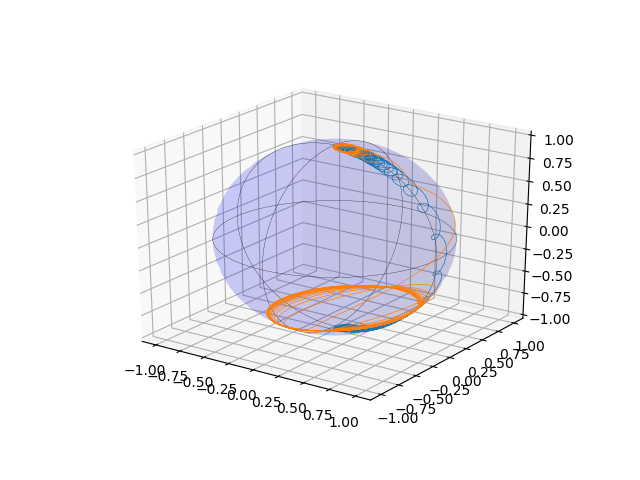

<IPython.core.display.Javascript object>


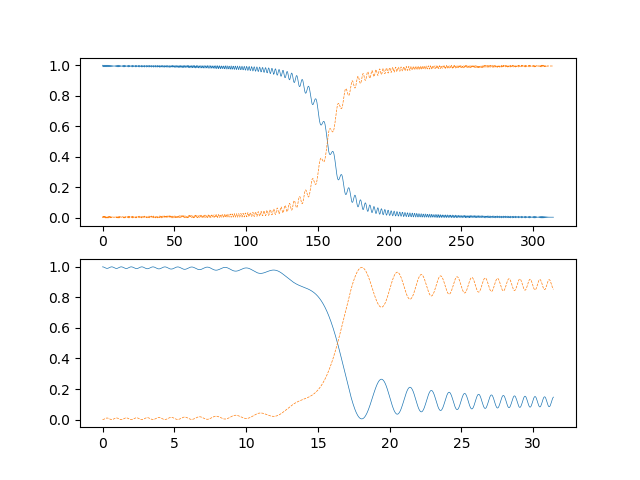

In [14]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.view_init(25, -55)

unitcircle(ax2)
makeplot(2*np.pi*50,1000,10,0,ax2,dΔ=True)
makeplot(2*np.pi*5,1000,10,0,ax2,dΔ=True)

figb, axb = plt.subplots(2, 1, sharey=True)
make2dplot(2*np.pi*50,1000,10,0,axb[0],dΔ=True)
make2dplot(2*np.pi*5,1000,10,0,axb[1],dΔ=True)

### Including Decoherence from Excited state Decays
Setting $\Gamma \neq 0$ causes the system to lose coherence. The magnitude of $\mathbf{R}$ decreases from 1 and tends to a value which depends on $\cos\theta$ where $\theta$ is the angle of inclination of $\mathbf{W}$.

As the system loses coherence, the two states decay to a constant population and no longer couple (as seen in the 2D-Graph, the oscilations decrease in magnitude). For very large values of $\Gamma$ the system loses coherence before the two levels properly couple, causing smaller changes in final populations.

<IPython.core.display.Javascript object>


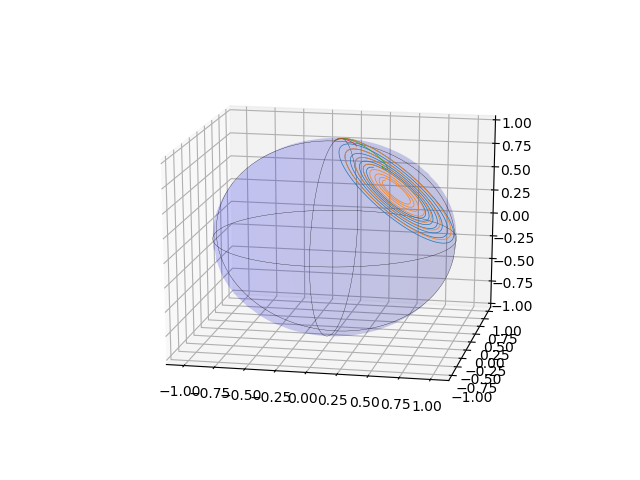

<IPython.core.display.Javascript object>


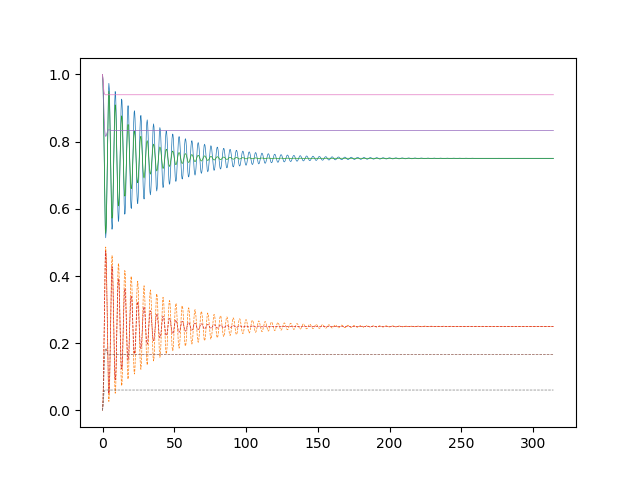

In [22]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
ax3.view_init(25, -55)


unitcircle(ax3)
makeplot(2*np.pi*5,1000,1,0.05,ax3,dΔ=False)
makeplot(2*np.pi*5,1000,1,0.1,ax3,dΔ=False)
makeplot(2*np.pi*5,1000,1,2,ax3,dΔ=False)
makeplot(2*np.pi*5,1000,1,5,ax3,dΔ=False)

figc = plt.figure()
axc = figc.gca()
make2dplot(2*np.pi*50,1000,1,0.05,axc,dΔ=False)
make2dplot(2*np.pi*50,1000,1,0.1,axc,dΔ=False)
make2dplot(2*np.pi*50,1000,1,2,axc,dΔ=False)
make2dplot(2*np.pi*50,1000,1,5,axc,dΔ=False)

Including decoherence loss during an adibatic change causes the population change to no longer be perfect. For large values of $\gamma$ the loss of coherence final population levels are almost the same as the initial ones.

By Increasing the value of $\Omega$ - through perhaps using a stronger E field - (with the length of the adiabatic transition kept constant in terms of the number of Rabi Osicllations), It is possible to improve the performance of the population inversion (as it is now completed in a faster time). The final values, however, are more uncertain.

<IPython.core.display.Javascript object>


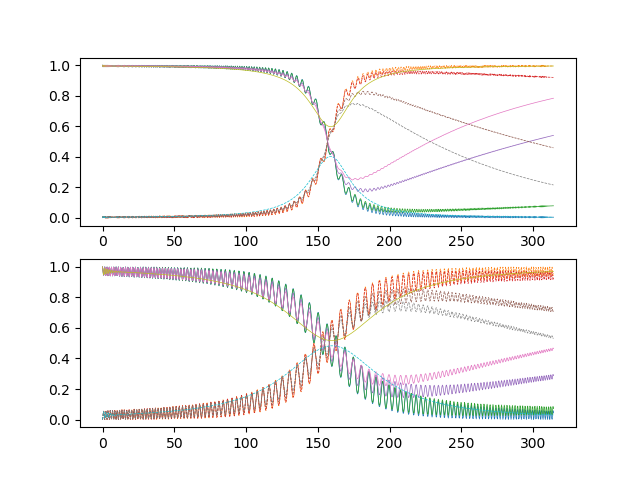

In [40]:
figd, axd = plt.subplots(2, 1, sharey=True)
make2dplot(2*np.pi*50,1000,10,0.0,axd[0],dΔ=True)
make2dplot(2*np.pi*50,1000,10,0.001,axd[0],dΔ=True)
make2dplot(2*np.pi*50,1000,10,0.01,axd[0],dΔ=True)
make2dplot(2*np.pi*50,1000,10,0.02,axd[0],dΔ=True)
make2dplot(2*np.pi*50,1000,10,1,axd[0],dΔ=True)

make2dplot(2*np.pi*50,1000,4,0.0,axd[1],dΔ=True)
make2dplot(2*np.pi*50,1000,4,0.0004,axd[1],dΔ=True)
make2dplot(2*np.pi*50,1000,4,0.004,axd[1],dΔ=True)
make2dplot(2*np.pi*50,1000,4,0.008,axd[1],dΔ=True)
make2dplot(2*np.pi*50,1000,4,0.4,axd[1],dΔ=True)
